In this notebook , To understand QAOA method we use four different methods 
1. Optimization using brute force method.
2. Use QAOA - And the result is similar as brute force method
3. Using NumpyMinimumEigensolver
4. Using VQE method

The Quantum Approximate Optimization Algorithm (QAOA) is a quantum computing algorithm designed to solve combinatorial optimization problems. It was 
introduced by Edward Farhi, Jeffrey Goldstone, and Sam Gutmann in 2014. QAOA is a hybrid quantum-classical algorithm, meaning it combines elements of quantum computing with classical optimization.

Here are the key principles on which the QAOA algorithm works:

1. __Qubit Representations:__ QAOA uses qubits, the fundamental units of quantum information, to represent binary variables. In the context of optimization problems, each qubit corresponds to a decision variable that can take on binary values (0 or 1).

2. __Cost Hamiltonian and Mixer Hamiltonian:__ QAOA involves two types of Hamiltonians, which are mathematical operators used in quantum mechanics. The Cost Hamiltonian encodes the objective function of the optimization problem, while the Mixer Hamiltonian is introduced to enable the exploration of different solutions.

3. __Quantum State Preparation:__ QAOA begins in a superposition of states, with qubits in a combination of 0 and 1 states. Quantum gates are applied to prepare this initial state.

4. __Variational Quantum Circuit:__ The algorithm uses a parameterized quantum circuit (variational circuit) that involves a sequence of quantum gates. These gates are controlled by classical parameters, and the goal is to find the optimal values for these parameters.

5. __Classical Optimization:__ The quantum state generated by the variational quantum circuit is measured, and the measurement outcomes are used to compute the objective function value. This information is then fed into a classical optimization routine to update the parameters of the quantum circuit in an attempt to minimize the objective function.

6. __Repetition and Iteration:__ The process of updating parameters, running the quantum circuit, and optimizing is repeated iteratively. The hope is that, as the parameters evolve, the quantum state approaches the optimal solution of the optimization problem.

7. __Ansatz Structure:__ The variational quantum circuit structure, known as the ansatz, is chosen based on the problem at hand. The specific form of the ansatz affects the algorithm's ability to find solutions efficiently.

QAOA - Quantum approximation optimization algorithm
It is a well-known algorithm for finding approximate solutions to combinatorial-optimization problems.
Combinatorial optimization involves finding the best solution from a finite set of possible solutions. These problems are prevalent in various fields such as logistics, finance, and machine learning.
QAOA Workflow for Logistic Optimization:
1. __Define the Logistic Objective Function__:
Define the logistic objective function that you want to minimize. In this case, it could be the total distance traveled by the fleet or the overall transportation cost.
Logistic Objective Function=∑edges Distance×Number of Trips on the Edge
2. __Encode into a Hamiltonian:__
Translate the logistic objective function into a Hamiltonian, which can be represented using Pauli Z operators on qubits. Each qubit corresponds to a particular decision variable, such as the choice of a specific route.
HC=∑edges 1/2(1−Z edge)×Cost of the Edge
Here,Zedge is a Pauli Z operator associated with a qubit representing a particular edge.
3. __Choose the Mixer Hamiltonian:__ Select a mixer Hamiltonian HB that promotes exploration of different routes. This could involve applying Pauli X operators on qubits associated with individual edges.
HB=∑edgesX edge
4. __Construct the QAOA Circuit:__
Design a parameterized quantum circuit U(γ,β) with alternating layers of e−iγHC and e−iβHB. The circuit will be repeated for a certain number of steps.
U(γ,β)=e −iβHB⋅e−iγHC
5. __Choose Initial Parameters:__
Initialize the parameters γ and β with arbitrary values. These parameters will be optimized to find the optimal solution.
6. __Optimize Parameters:__
Use a classical optimization algorithm to find the values of γ and β that minimize the expectation value of the logistic objective function. Run the quantum circuit multiple times and adjust the parameters based on the measurement outcomes.
7. __Extract Solution:__
The final set of parameters provides an approximate solution to the logistic optimization problem. Measure the qubits to obtain the final configuration of routes for the fleet.

In [3]:
#CODE
import qiskit

In [4]:
#CODE
import numpy as np
import networkx as nx 

# from qiskit import Aer #it is IBM Q's simulator Aer
from qiskit_algorithms import NumPyMinimumEigensolver

<span style="font-size: 20pt;">__!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Networkx!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!__
</span>

there are many use cases of networkx here - Graph Creation and Manipulation , Graph Visualization , supports reading and writing graphs in various formats,including adjacency lists, edge lists, GML, GraphML.
for example - this is an simple code to understand how to use networkx 
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4])

# Add edges
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Visualize the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

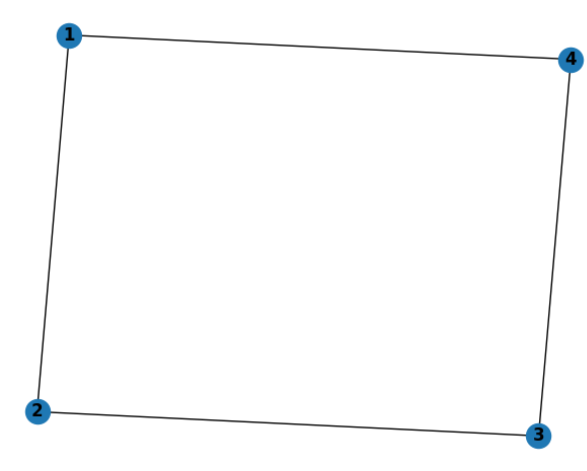
<!-- <img src="C:\Users\aqisd\Pallavi\networknx .png" alt="Jupyter Logo" width="100" height="100"> -->


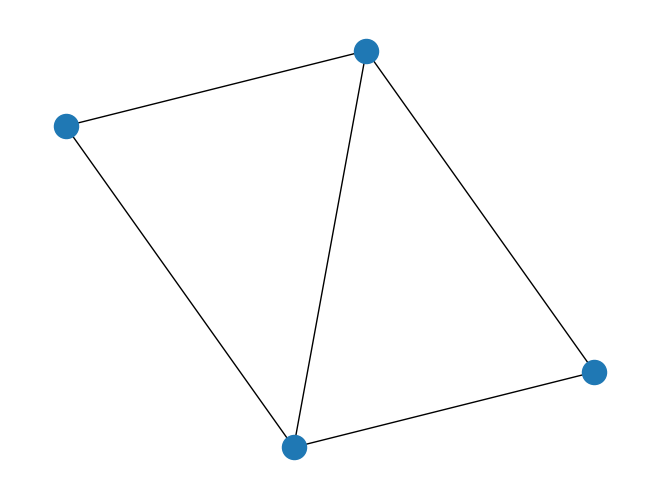

In [5]:
#CODE
num_nodes = 4
w = np.array([[0., 1., 1., 0.],
              [1., 0., 1., 1.],
              [1., 1., 0., 1.],
              [0., 1., 1., 0.]])
G = nx.from_numpy_array(w)
nx.draw(G)

num_nodes = 4: This line defines a variable num_nodes with a value of 4, indicating that the graph will have four nodes.

w = np.array([[0., 1., 1., 0.], [1., 0., 1., 1.], [1., 1., 0., 1.], [0., 1., 1., 0.]]): This line creates a NumPy array w, representing a 4x4 matrix. Each element of the matrix (w[i, j]) indicates whether there is an edge between node i and node j. In this case, the matrix represents an undirected graph with the following edge
The matrix is symmetric because the graph is undirected. If there is an edge between node i and node j, then there is also an edge between node j and node i.

G = nx.from_numpy_matrix(w): This line uses NetworkX's from_numpy_matrix function to create a graph (G) from the NumPy matrix w. The resulting graph has nodes corresponding to the rows and columns of the matrix and edges corresponding to the non-zero entries in the matrix.

In this specific example, G represents the undirected graph described by the adjacency matrix w. Each row and column in the matrix corresponds to a node, and the non-zero entries indicate the presence of edges between.
You can use various NetworkX functions to analyze and visualize the properties of the created graph. For example, you can use nx.draw(G) to visualize the graph.des.s:

{(0, 1): Text(0.7024844288825989, 0.3847779016941786, '1.0'),
 (0, 2): Text(0.634913831949234, 0.12277430109679699, '1.0'),
 (1, 2): Text(0.5660776197910309, 0.48680025339126587, '1.0'),
 (1, 3): Text(0.4158555418252945, 0.7546672821044922, '1.0'),
 (2, 3): Text(0.3482849448919296, 0.4926636815071106, '1.0')}

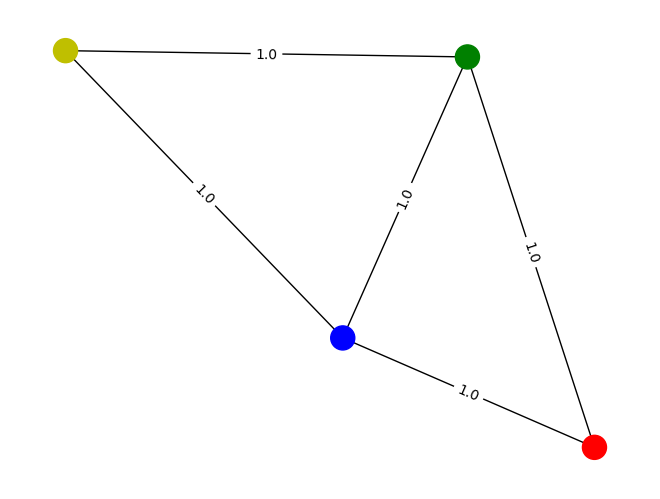

In [6]:
#CODE
layout = nx.random_layout(G, seed=10)
colors = ['r', 'g', 'b', 'y']
nx.draw(G, layout, node_color=colors)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)

nx.random_layout(G, seed=10): This line generates a random layout for the graph G using the Fruchterman-Reingold force-directed algorithm. The seed=10 argument sets the random seed for reproducibility. The layout is a dictionary where each node of the graph is associated with its coordinates.

This line defines a list of colors ('r' for red, 'g' for green, 'b' for blue, and 'y' for yellow). The colors will be used to differentiate nodes in the graph.

nx.draw(G, layout, node_color=colors): This line uses the nx.draw function to visualize the graph. The layout argument specifies the node positions obtained from the random layout. The node_color argument specifies the colors of nodes based on the colors list.

nx.get_edge_attributes(G, 'weight'): This line retrieves the edge weights from the graph G and stores them in a dictionary called labels. Each edge in the graph is associated with its weight.

nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels): This line adds edge labels to the visualization. It places text labels on the edges of the graph, and the labels are taken from the labels dictionary.

To visualize the above matrix and its nodes
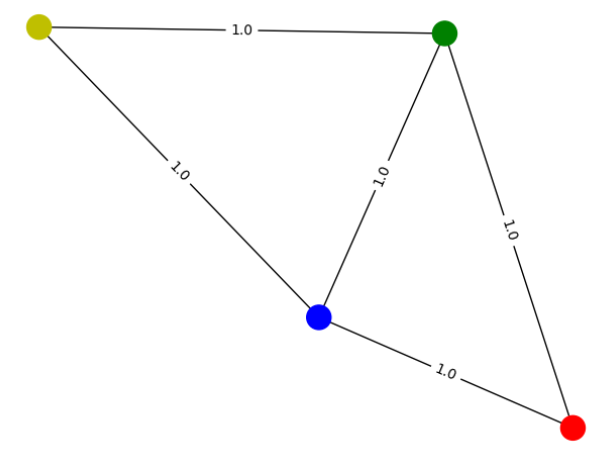

<span style = "font-size: 16pt">__1st method__</span>

<span style = "font-size: 16pt">__The brute-force method__</span>

Basically, we exhaustively try all the binary assignments. In each binary assignment, the entry of a vertex is either 0 (meaning the vertex is in the first partition) or 1 (meaning the vertex is in the second partition). We print the binary assignment that satisfies the definition of the graph partition and corresponds to the minimal number of crossing edges.</span>

In [7]:
#CODE
def objective_value(x, w):
    X = np.outer(x, (1 - x))
    w_01 = np.where(w != 0, 1, 0)
    return np.sum(w_01 * X)

    # use the brute-force way to generate the oracle
def bitfield(n, L):
    result = np.binary_repr(n, L)  
        # print(result) -- if we try this line, by commenting lower return then the value we got is not a list 
    return [int(digit) for digit in result]  # bcoz of this line we get the output in the form of list # [2:] to chop off the "0b" part

L = num_nodes
max = 2**L
sol = np.inf
for i in range(max):
    cur = bitfield(i, L)
        # print(cur) # -- Here wet get output as --- [1, 1, 1, 1]

    how_many_nonzero = np.count_nonzero(cur)
        # print(how_many_nonzero)  # ---- this line gives - 4 as output since cur = [1, 1, 1, 1] 
    if how_many_nonzero * 2 != L:  # not balanced
        continue

    cur_v = objective_value(np.array(cur), w)
    if cur_v < sol:
         sol = cur_v

print(f'Objective value computed by the brute-force method is {sol}')

Objective value computed by the brute-force method is 3


output for the above code -> __Objective value computed by the brute-force method is 3__

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Lets break down the above code !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ------>

<span style="font-size: 16pt;">__TO UNDERSTAND THIS LINE OF CODE WE NEED TO UNDERSTAND THE WORKFLOW OF THE CODE THAT IS WHEN THIS FUNCTION IS CALLED -- 
IN LINE 22 IT IS CALLED WITH THE ARGUMENT (np.array(cur) , w)__</span>

for this we have to start from line 12 - L = num_nodes = 4

13 --- max = 2**L = 2^4 = 2*2*2*2 = 16

14 --- minimal_v = np.inf = will set minimal_v variable to positive infinity

15 --- for loop --- where max = 16 ---- so this loop goes from 0 to 16

16 --- cur = bitfield(i,L) -- calls the bitfield function so get back to that code where n -> i and L is same 

17 --- print(cur) --- here we get -- [1, 1, 1, 1]

here in the function-- bitfield(n, L) -- np.binary_repr(n,L) --- n that is i is the number which is to be converted into its binary form and L is its width that is 4 this is why the bits in the lower list are of width 4 that is only 4 bits are there Decimal: i = 0, Binary: 0000, 
Decimal: 1, Binary: 0001, 
Decimal: 2, Binary: 0100
Decimal: 3, Binary:0, 11
Decimal: 4, Binar0 , 100
Decimal: 5, Bi: y:, 0101
Decimal: 6, B:nry,  0110
Decimal: 7,yinar, : 0111
Decimal: r Bina, y: 1000
Decimala9, Bin, ry: 1001
Deciman 10, Bi, ary: 1010
Deciil: 11, B, nary: 1011
DeBmal: 12, , inary: 1100
 cimal: 13,, Binary: 1101
ecimal: 14,  Binary: 115, Decimal: 1, , Binary: 1111
Decimal: 16, Binary: 10000output
ives th t as --- 
      [0, 0, 0, 0] - for result = np.binary_repr(0, 4) , return [int(digit) for digit in result]- this gives th output as list
  ]    
[0, 0, 0, 1 - for result = np.binary_repr(1, 4) , return [int(digit) for digit in result]- this gives th output as list] 0]  - for result = np.binary_repr(2, 4) , return [int(digit) for digit in result]- this gives the output as listt as list0 1]     ]
[0, 0, 1, - for result = np.binary_repr(3, 4) , return [int(digit) for digit in result]- this gives the ot as list, 0]      1]
[0, 1, 0 - for result = np.binary_repr(4, 4) , return [int(digit) for digit in result]- this giveshe outt as lis0, 1],       0]
[0, 1,  - for result = np.binary_repr(5, 4) , return [int(digit) for digit in result]- this give the t as li 1, 0]st0      , 1]
[0, 1, - for result = np.binary_repr(6, 4) , return [int(digit) for digit in result]- this gives the t as l, 1, 1]st       1, 0]
[0, 1 - for result = np.binary_repr(7, 4) , return [int(digit) for digit in result]- this gts thet as 0, 0, 0]ist,       1, 1]
[1,  - for result = np.binary_repr(8, 4) , return [int(digit) for digit in result]- this gt as 0, 0, 1] list0      , 0, 0]
[1, - for result = np.binary_repr(9, 4) , return [int(digit) for digit in result]- this gives t a, 0, 1, 0]s list       0, 0, 1]
[1 - for result = np.binary_repr(10, 4) , return [int(digit) for digit in result]- thist 1, 0, 1, 1]as list,       0, 1, 0]
[ - for result = np.binary_repr(11, 4) , return [int(digit) for digit in result]- thit[1, 1, 0, 0] as list1      , 0, 1, 1]
 - for result = np.binary_repr(12, 4) , return [int(digit) for digit in result]- thts the output as list
      [1, 1, 0, 1] - fo3 result = np.binary_repr(14, 4) , return [int(digit) for digit in result]- ths gives the output]as list
      
[1, 1, 1, 0 - fo4 result = np.binary_repr(15, 4) , return [int(digit) for digit in result]- ths gives the outp 1]ut as list]      
[1, 1, 1,  - f5r result = np.binary_repr(16, 4) , return [int(digit) for dige output as listit in result]- this gives th
19 --- how_many_nonzero = np.count_nonzero(cur) counts the number of non-zero elements in the current binary vector.

[0,, 0] - no of1] nonzero = 
    0
 , 0, 0,  -, 0] no of nonzero = ]
[0, 0, 1 1, 1]- no of nonzero = 
[0, 1, 0, 0] 0, - no of nonzero 
2
, 1, 0, 1][0,] - no of nonzer]
[0, 1, 1, 0]1
[0 - no of non  1
[0, 1, 1, 1]]
2
 - no of non3zro = 
[0, 1], 1, 1]
 - no of nozero = 3
[ 1]1, 0, 0, 0 - no of zero = 
 1, 0]
1
[1, 0, 0, - no ozero = , 1, 1]1]
2
[1, 0,  - nozero  1, 0, 0]= , 0]
2
[1, 0 - zer1, 1, 0, 1]o =  1, 1]
3
[1, nz[1, 1, 1, 0]ero = 1, 0, 0]
2
onzero = , 1,  - no of nonzero = , 
 - no of nonzero = [11, 1, 0]
3
[1, 1, 1, 1]
4




The condition if how_many_nonzero * 2 != L checks if the binary vector is "balanced" (has an equal number of 0s and 1s). If not ----- after this line also the output is same , it ski to the next iteration
utput as list1
]
[1, 1, 1, 1]





cur_v = objective_value(np.array(cur), w) -> so here here when objective_value function calls it gives 
first have to get outer product of X and 1-X 
X = np.outer(x, (1 - x))
np.array(cur) = 
[[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 1]]

(1-X) = (1 - np.a
[[1 1 1 1]
 [1 1 1 0]
 [1 1 0 1]
 [1 1 0 0]
 [1 0 1 1]
 [1 0 1 0]
 [1 0 0 1]
 [1 0 0 0]
 [0 1 1 1]
 [0 1 1 0]
 [0 1 0 1]
 [0 1 0 0]
 [0 0 1 1]
 [0 0 1 0]
 [0 0 0 

X(1-X) = 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 
????????????????????????????their is some doubt about what is the use of w_01 and in this line return np.sum(w_01 * X) how 4*4 get multiplied by 64*64 matrix ------

Let's break down the code for the objective_value function:
This function calculates the objective value for a given binary vector x and a weight matrix w. It is designed for a combinatorial optimization problem where x represents a binary decision vector, and w represents a weight matrix associated with the problem.

np.outer(x, (1 - x)) calculates the outer product of the binary vector x with its complement (1 - x). The result is a matrix X where each element Xij is the product of xi and (1−xj).

np.where(w != 0, 1, 0) creates a binary indicator matrix w_01 based on the weights in matrix w. If an element in w is non-zero, the corresponding element in w_01 is set to 1; otherwise, it is set to 0.

np.sum(w_01 * X) calculates the element-wise product of the matrices w_01 and X. The sum of these products gives the overall objective value for the given binary vector x and weight matrix w.
This operation effectively filters out elements in X where the weight in w is zero, as those products become z aro in the sum.
0 0]]1]
 [0 0 0 0]]
rray(cur))  =  1]
 [0 0 0 0]]

<span style="font-size: 16pt;">__!!!!!!!!!!!!!!!!An example of brute force method__!!!!!!!!!!!!!!!!!!!!!!!</span>


Let's consider a simple example of a brute force approach to find the minimum value of a quadratic function. The objective is to find the value of 
x that minimizes the functn x(
x^2-4x+4+4.

In a brute force approach, we can evaluate the function for everyssible val 
�
x within a certaiof nrange c
ode for this example
def quadratic_function(x):
    return x**2 - 4*x + 4

def brute_force_optimization():
    # Define the range of x values to explore
    x_values = range(-10, 11)

    # Initialize variables to store the minimum value and corresponding x

The line min_value = float('inf') initializes the variable min_value to positive infinity. This is a common practice when shing for the     minimum value in an optimization problem using brute force.
The idea behind initializing min_value to positive infinity is to ensure that any initial comparison made during the brute force search will result in the current value being considered as smaller than the initially set min_value. In other words, any valid value encountered during the search will be smaller than positive infinity, so it will replace the initial value of min_value.
  
      min_value = float('inf')
    optimal_x = None

    # Brute force search
    for x in x_values:
        current_value = quadratic_function(x)
        if current_value < min_value:
            min_value = current_value
            optimal_x = x

    return optimal_x, min_value

# Perform brute force optimization
optimal_x, min_value = brute_force_optimization()

# Print the results
print(f"The optimal value of x: {optimax}")
print(f"The minimum value of the uadratic function: {min_value}")



<span style="font-size: 16pt;">__!!!!!!!!!!!!!!!!2nd method - QAOA!!!!!!!!!!!!!!!!!!!!!!!</span>

The graph partition problem can be converted to an Ising Hamiltonian.Qiskit has different capabilities in the Optimization module to do this. Here, 
since the goal is to show QAOA, the module is used without further explanation to create the operator. The paper Ising formulations of many NP problems 
may be of interest if you would like to understand the technique further.

<span style="font-size: 16pt;">__Here is the example of PauliSumOp class of opflow of qiskit__</span>

from qiskit.quantum_info import Pauli
from qiskit.opflow import PauliSumOp

# Define Pauli operators
pauli1 = Pauli('XIZ')
pauli2 = Pauli('ZIX')

# Define coefficients
coeff1 = 0.5
coeff2 = -1.0

# Create PauliSumOp
pauli_sum_op = PauliSumOp([(coeff1, pauli1), (coeff2, pauli2)])

# Now, pauli_sum_op represents the operator 0.5 * XIZ - ZIX

In [8]:
from qiskit.quantum_info import Pauli, SparsePauliOp
# from qiskit.opflow import PauliSumOp

def get_operator(weight_matrix):
    r"""Generate Hamiltonian for the graph partitioning
    Notes:
        Goals:
            1 separate the vertices into two set of the same size
            2 make sure the number of edges between the two set is minimized.
        Hamiltonian:
            H = H_A + H_B
            H_A = sum\_{(i,j)\in E}{(1-ZiZj)/2}
            H_B = (sum_{i}{Zi})^2 = sum_{i}{Zi^2}+sum_{i!=j}{ZiZj}
            H_A is for achieving goal 2 and H_B is for achieving goal 1.
    Args:
        weight_matrix (numpy.ndarray) : adjacency matrix.
    Returns:
        PauliSumOp: operator for the Hamiltonian
        float: a constant shift for the obj function.
    """
    num_nodes = len(weight_matrix)
    pauli_list = []
    shift = 0

    for i in range(num_nodes):
        for j in range(i):
            if weight_matrix[i, j] != 0:
                x_p = np.zeros(num_nodes, dtype=bool)
                z_p = np.zeros(num_nodes, dtype=bool)
                z_p[i] = True
                z_p[j] = True
                pauli_list.append([-0.5, Pauli((z_p, x_p))])
                shift += 0.5

    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                x_p = np.zeros(num_nodes, dtype=bool)
                z_p = np.zeros(num_nodes, dtype=bool)
                z_p[i] = True
                z_p[j] = True
                pauli_list.append([1, Pauli((z_p, x_p))])
            else:
                shift += 1
                
    pauli_list = [(pauli[1].to_label(), pauli[0]) for pauli in pauli_list]
    return SparsePauliOp.from_list(pauli_list), shift

qubit_op, offset = get_operator(w)

__for the first loop in the above code__
Part H_A:
Iteration 1 (i=0, j=0):

Diagonal term, no edge. Skipped.
Iteration 2 (i=1, j=1):

Diagonal term, no edge. Skipped.
Iteration 3 (i=1, j=0):

Edge between nodes 0 and 1 (weight_matrix[1, 0] = 1).
Construct Pauli 
(
�



5⋅(Z 
1
​
 Z 
0
​
 ).
Increment shift by 0.5.
Iteration 4 (i=2, j=2):

Diagonal term, no edge. Skipped.
Iteration 5 (i=2, j=0):

Edge between nodes 0 and 2 (weight_matrix[2, 0]li operoZ0⋅
(
�
2
�
0
)
−0.5⋅(Z 
2
​
 Z 
0
​
 
c al term 
1
2
⋅
(
�
2
�
0
)
2
1
​
 ⋅(Z 
2
​
 Z 
0
​
 ).
Adjust shift by -0.5.
Iteration 6 (i=2, j=1):

Edge  (weighmx,= 1).
Construct Pauli operator 
−
0.5
⋅
(
�
2
�
1
)
−0.5⋅(Z 
2
​
 Z 
1
​
 ).
Increment shift by 0.5.
Iteration 7 (i=3, j=3):

Diagonal term, no edge. Skipped.
Iteratioge betwne0 3 (weight_matrix[3, 0] = 1).
Construct Pauli operator 
−
0.5
⋅
(
�
3
�
0
)
−0.5⋅(Z 
3
​
 Z 
0
​
 ).
Increment shn 9 (i= :
e between nodes 1 and 3 (weight_matrix[3, 1] = 1).
Construct Pauli operator 
−
0.5
⋅
(
�
3
�
1
)
−0.5⋅(Z 
3
​
 Z 
1
ft by 0.et10 (i=3, j=2):

Edge between nodes 2 and 3 (weightPart H_B:
Iteration 1 (i=0, j=0):

Diagonal term. Construct Pauli operato02

2
​
 .
Increment shift by 1.
Iteration 2 (i=0, j=1):

Edge between nodes 0 and 1. Construct Par


Z 
0
​
 Z 
1
​
 .
Iteration 3 (i=0, j=2):

Edge between nodes 0 and u ipr 
�
0
�
2
Z 
0
​
 Z 
2
​
 .
Iteration 4 (i=0, j=3):

Edge betwee dCs Pauli operator 
�
0
�
3
Z 
0
​
 Z 
3
​
 .
Iteration 5 (i=1, j=0):
eeo0d 0. Construct Pauli operator 
�
1
�
0
Z 
1
​
 Z 
0
​
 ao 1, j=1):

Diagonal term. Construct Pauli operator 
�
1
2
Z 
1
2
​
 .
Increment shift by 1.o71j

Edge between nodes 1 and 2. Construct Pauli operator 
�
1
�
2
Z 
1
​
​ ta8 (i=1, j=3):

Edge between nodes 1 and 3. Construct Pauli operator 
�
1
�1​ 3 .
Iteration 9 (i=2, j=0):

Edge between nodes 2 and 0. Construct Pauli opera2�


 Z 
0
​
 .
Iteration 10 (i=2, j=1):

Edge between nodes 2 aotuuli operator 
�
2
�
1
Z 
2
​
 Z 
1
​
 .
Iteration 11 (i=2, j=2):

Diagonal term. Construor �2
Z 
2
2
​
 .
Increment shift by 1.
Iteration 12 (i=2, j=3):

Edge betw a.oct Pauli operator 
�
2
�
3
Z 
2
​
 Z 
3
​
 .
Iteration 13 (i=3, j=0) t dand 0. Construct Pauli operator 
�
3
�
0
Z 
3
​
 Z 
0
​
 .
Iteration 1
dtween nodes 3 and 1. Construct Pauli operator 
�
3
�
1
Z 
3



Iteration 15 (i=3, j=2):

Edge between nodes 3 and 2. Construct Pauli operator 
�
3
�
2
Z 
3
​
 Z 
2
​
 .
Iteration 16 (i=3, j=3):

Diagonal term. Construct Pauli operator 
�
3
2
Z 
3
2
​
 .
Increment shift by 1.
The resulting pauli_list and shift represent the Hamiltonian for the graph partitioning problem, considering both the minimization of edges between sets and the equal partitioning of vertices.Iteration 1
dgtween nodes 3 and 1. Consruct Pauli operator 
�
3
�
1
Z 
3

3
 teration 15 (i=3, j=
2):

Edge betwnstructaor 
�
3
�
2
Z 
3
​
 Z 
2
​
 .
Iteration 16 (i=3, j=3):

Diagonal term. Construct Pauli operator 
�
3
2
Z 
3
2
​
 .
Increment shift by 1.ween nodes 2 and 3 (weight_matrix[3, 2] = 1).
Construct Pauli operator 
−
0.5
⋅
(
�
3
�
2
)
−0.5⋅(Z 
3
​
 Z 
2
​
 ).
Increment shift by 0.5.

import numpy as np
from qiskit.quantum_info import Pauli

num_nodes = 4
weight_matrix = np.array([[0., 1., 1., 0.],
                          [1., 0., 1., 1.],
                          [1., 1., 0., 1.],
                          [0., 1., 1., 0.]])

pauli_list = []
shift = 0.0

for i in range(num_nodes):
    for j in range(i):
        if weight_matrix[i, j] != 0:
            x_p = np.zeros(num_nodes, dtype=bool)
            z_p = np.zeros(num_nodes, dtype=bool)
            z_p[i] = True
            z_p[j] = True
            pauli_list.append([-0.5, Pauli((z_p, x_p))])
            shift += 0.5

print("Pauli List:", pauli_list)
print("Shift:", shift)


Now, let's break down the loop for the given weight_matrix:

Iteration 1 (i=1, j=0):

weight_matrix[1, 0] = 1, so the condition is satisfied.
Construct a Pauli operator 
P10 =−0.5⋅(Z1Z0).
Increment shift by 0.5.
Iteration 2 (i=2, j=0), (i=2, j=1):
weight_matrix[2, 0] = 1 and weight_matrix[2, 1] = 1, so the conditions are satisfied for both pairs.
Construct Pauli operators P20=−0.5⋅(Z2Z0) and P21=−0.5⋅(Z2Z1).
Increment shift by 0.5 for each pair.
Iteration 3 (i=3, j=0), (i=3, j=1), (i=3, j=2):
Similar to the previous iterations, construct Pauli operators for the pairs satisfying the conditions.
Increment shift by 0.5 for each pair.
The resulting pauli_list would contain Pauli operators for the pairs of nodes with nonzero weights in the weight_matrix. The shift variable would reflect the total shift in the Hamiltonian.
For the given example, the printed pauli_list and shift would be:
Pauli List: [[-0.5, Pauli(z=[True, False, False, True], x=[False, False, False, False])],
             [-0.5, Pauli(z=[True, True, False, False], x=[False, False, False, False])],
             [-0.5, Pauli(z=[False, True, True, False], x=[False, False, False, False])]]
Shift: 1.5

So lets use the QAOA algorithm to find the solution.

In [9]:
from collections import OrderedDict
from qiskit_algorithms.utils import algorithm_globals
from qiskit_algorithms import QAOA
from qiskit.quantum_info import Statevector
from qiskit_algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Sampler
from qiskit.result import QuasiDistribution

sampler = Sampler()
def sample_most_likely(state_vector):
    """Compute the most likely binary string from state vector.
    Args:
        state_vector (numpy.ndarray or dict): state vector or counts.
    Returns:
        numpy.ndarray: binary string as numpy.ndarray of ints.
    """
    if isinstance(state_vector, QuasiDistribution):
        values = list(state_vector.values())
    else:
        values = state_vector
    n = int(np.log2(len(values)))
    k = np.argmax(np.abs(values))
    x = bitfield(k ,n)
    x.reverse()
    return np.asarray(x)


def objective_value(x, w):
    """Compute the value of a cut.
    Args:
        x (numpy.ndarray): binary string as numpy array.
        w (numpy.ndarray): adjacency matrix.
    Returns:
        float: value of the cut.
    """
    X = np.outer(x, (1 - x))
    w_01 = np.where(w != 0, 1, 0)
    return np.sum(w_01 * X)

algorithm_globals.random_seed = 10598

optimizer = COBYLA()
qaoa = QAOA(sampler, optimizer, reps = 2)

result = qaoa.compute_minimum_eigenvalue(qubit_op) # here compute_minimum_eigenstate is also an inbuilt function

x = sample_most_likely(result.eigenstate) # this eigenstate is provided by QAOA algorithm

print(x)
print(f'Objective value computed by QAOA is {objective_value(x, w)}')

[1 1 0 0]
Objective value computed by QAOA is 3


__Now if we go step by step__ -> to understand the workflow of the above code we need to go from 

1. x = sample_most_likely(result.eigenstate) -> Here result = qaoa.compute_minimum_eigenvalue(qubit_op) -> ?????????????first i need to understand what is the value of qubit_op then i can go further with the workflow  

1. from collections import __OrderedDict__:remembers the order in which items were inserted.Useful when you want to maintain the order of key-value pairs in a dictionary.

2. from qiskit.utils import __algorithm_globals__:includes settings related to random number generation, such as the random seed.

3. from qiskit.algorithms import __QAOA__:It's a quantum algorithm designed for combinatorial optimization problems. QAOA uses a parameterized quantum circuit to approximate the ground state of a cost Hamiltonian associated with the optimization problem.

4. from qiskit.opflow import __StateFn__:It represents a state vector or a density matrix and can be used to create quantum states that can be input into quantum algorithms.

5. from qiskit.algorithms.optimizers import __COBYLA__:It stands for Constrained Optimization BY Linear Approximations and is a derivative-free optimization algorithm.It can be used to optimize the parameters of quantum circuits in variational algorithms like QAOA.

6. from qiskit.circuit.library import __TwoLocal__: TwoLocal is a library function in Qiskit that generates a parameterized quantum circuit. It is commonly used in variational algorithms where the circuit parameters are optimized to find the solution to a given problem. In the context of QAOA, TwoLocal might be used to create the ansatz circuit for the algorithm.

7. isinstance(state_vector, (OrderedDict, dict)): This checks if state_vector is an instance of either OrderedDict or dict. If it is, the code inside this block is executed, handling the case where state_vector is a dictionary.
8. 
isinstance(state_vector, StateFn): This checks if state_vector is an instance of the StateFn class. If it is, the code inside this block is executed, handling the case where state_vector is a StateFn object.9. 

else: If state_vector is not an instance of either OrderedDict/dict or StateFn, the code inside the else block is executed. This part of the code assumes that state_vector is a NumPy ar

__WORKFLOW OF THE CODE__

1. sample_most_likely Function:
This function takes a quantum state vector (or counts) as input and returns the most likely binary string representation of the quantum state
2. Type Checking Using isinstance:
This part checks the type of the state_vector parameter.   
If it's an instance of OrderedDict or dict, it treats it as counts and extracts the binary string with the largest count   .
If it's an instance of StateFn, it samples a binary string based on the state probabilitie   s.
If it's not one of the above types, it assumes it's a NumPy array representing a state vector and extracts the most likely binary str
3. Extracting Binary String from Counts (Dictionary):
If state_vector is a dictionary, this part extracts the binary string with the largest count and converts it to a NumPy array
4. Sampling Binary String from StateFn:
If state_vector is a StateFn, this part samples a binary string and converts it to a NumPy array
5. Extracting Binary String from State Vector (NumPy Array):
If state_vector is a NumPy array, this part interprets it as a state vector and extracts the most likely binary string
6. objective_value Function:
This function computes the value of a cut given a binary string x and an adjacency matrix w
7. QAOA Setup and Execution:
Sets a random seed for reproducibilit,
Initializes a COBYLA optimiz, .
Creates a QAOA instance with the specified optimizer and a quantum backend (statevector simulat, ).
Calls the compute_minimum_eigenvalue method on QAOA to find the minimum eigenvalue of a given Hamiltonian (qubit_
8. Extracting Results and Printing:
The most likely binary string x is obtained by applying the sample_most_likely function to the eigenstate obtained from QAO, 
The objective value of the cut is computed using the obtained binary string and the adjacency matrix, .
The resulting binary string and the computed objective value are print
ed.op).....ing..ray.

The outcome can be seen to match to the value computed above by brute force. But we can also use the classical NumPyMinimumEigensolver to do the 
computation, which may be useful as a reference without doing things by brute force.

<span style = "font-size:16pt">__!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!3rd METHOD !!!!!!!!!!!!!!!!!!!!!!!!__</span>

<span style = "font-size:16pt">__!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Numpyminimum eigen solver !!!!!!!!!!!!!!!!!!!!!!!!__</span>

PRACTICALLY EIGENVALUES ARE NOTHING BUT SCALAR MULTIPLE OF A VECTOR - BY FINDING THE MINIMUM EIGENVALUE WE GET TO KNOW THAT WHICH IS THE SMALLEST ROUTE 
FOR LOGISTICS

from qiskit.algorithms 

import NumPyMinimumEigensolver

import numpy as np

# Create a simple 2x2 Hamiltonian matrix
hamiltonian_matrix = np.array([[1, 0], [0, -1]])

# Instantiate NumPyMinimumEigensolver
solver = NumPyMinimumEigensolver()

# Compute the minimum eigenvalue
result = solver.compute_minimum_eigenvalue(operator=hamiltonian_matrix)

# Retrieve results
min_eigenvalue = result.eigenvalue
min_eigenvector = result.eigenstate

print("Minimum Eigenvalue:", min_eigenvalue)
print("Corresponding Eigenvector:", min_eigenvector)

!!!!!!!!!!!!!!!!!!!!!!!!workflow of numpyminimumeigensolver !!!!!!!!!!!!!!!!!!!!!!!!!
Matrix Representation:

First, you have a quantum problem that can be represented by a Hamiltonian matrix H. This matrix represents the observable associated with the 
problem, and finding its minimum eigenvalue often corresponds to solving the problem.

Class Initialization:# When you instantiate the NumPyMinimumEigensolver class, you are creating an instance of a classical algorithm within the 
Qiskit library.

Computing Minimum Eigenvalue:The compute_minimum_eigenvalue method is then used to find the minimum eigenvalue of the given matrix.Here, 
hamiltonian_matrix is the matrix representation of the Hamiltonian associated with your quantum problem

Eigenvalue Computation: Internally, the algorithm implemented in NumPyMinimumEigensolver uses classical linear algebra methods to find the 
minimum eigenvalue of the provided matrix.

In this case, it uses NumPy's linear algebra functions to perform the eigenvalue decomposition.
Result Object:The result object contains information about the computation, including the minimum eigenvalue and, optionally, the corresponding 
eigenvector.

In [15]:
from qiskit_algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
npme = NumPyMinimumEigensolver()
result = npme.compute_minimum_eigenvalue(qubit_op)

x = sample_most_likely(result.eigenstate)

print(x)
print(f'Objective value computed by the NumPyMinimumEigensolver is {objective_value(x, w)}')

[1 1 0 0]
Objective value computed by the NumPyMinimumEigensolver is 3
